<a href="https://colab.research.google.com/github/aprajeeta10/python-projects/blob/main/Portfolio_Optimization_using_Python_and_Modern_Portfolio_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1: Define Tickers and Time Range**

First, we define a list of tickers for the assets we want to include in the portfolio. In this example, we use five ETFs representing various asset classes: SPY, BND, GLD, QQQ, and VTI. We then set the start and end dates for our analysis. We use a five-year historical time range for our calculations.



In [ ]:
import pandas as pd
import numpy as np

# Import the datetime module
from datetime import datetime, timedelta

tickers = ['SPY','BND','GLD','QQQ','VTI']
end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

**Section 2: Download Adjusted Close Prices**

Next, we create an empty DataFrame to store the adjusted close prices of each asset. We use the yfinance library to download the data from Yahoo Finance.

In [ ]:
import yfinance as yf

adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Section 3: Calculate Lognormal Returns**

In [ ]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))

**Section 4: Calculate Covariance Matrix**

In [ ]:
cov_matrix = log_returns.cov() * 252

**Section 5: Define Portfolio Performance Metrics**

In [ ]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

**Section 6: Portfolio Optimization**

> We set the risk-free rate, define a function to minimize the negative Sharpe ratio, and set constraints and bounds for the optimization process.




In [ ]:
from scipy.optimize import minimize
risk_free_rate = .02

def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.4) for _ in range(len(tickers))]
initial_weights = np.array([1/len(tickers)]*len(tickers))

optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

The provided code is for optimizing the weights of a portfolio of assets to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

* from scipy.optimize import minimize

This function is used to find the minimum of a scalar function of one or more variables. In this context, it's used to maximize the Sharpe ratio by minimizing its negative.

* risk_free_rate = .02

This is the rate of return of a theoretically risk-free investment, like government bonds.

* def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

This function calculates the negative Sharpe ratio for a given set of portfolio weights. It takes the portfolio weights, logarithmic returns, covariance matrix, and risk-free rate as inputs, and returns the negative of the Sharpe ratio. The reason for returning the negative Sharpe ratio is that the minimize function can only minimize functions, so to maximize the Sharpe ratio, its negative is minimized.

* constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

This constraint ensures that the sum of the portfolio weights is equal to 1, meaning that all available capital is invested.

* bounds = [(0, 0.4) for _ in range(len(tickers))]

This specifies that each asset's weight in the portfolio should be between 0 and 0.4. This prevents any single asset from having a weight greater than 40% of the total portfolio.

* initial_weights = np.array([1/len(tickers)]*len(tickers))

This sets the initial guess for the portfolio weights, with equal allocation to each asset.

* optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

This calls the minimize function to find the optimal portfolio weights that maximize the Sharpe ratio. It uses the Sequential Least Squares Programming (SLSQP) method, which can handle both equality constraints and bounds.


**Section 7: Analyze the Optimal Portfolio**

In [ ]:
optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SPY: 0.2000
BND: 0.0000
GLD: 0.4000
QQQ: 0.4000
VTI: 0.0000
Expected Annual Return: 0.1505
Expected Volatility: 0.1614
Sharpe Ratio: 0.8089


This code snippet takes the optimal weights from the optimization process, calculates the expected return, volatility, and Sharpe ratio for the optimized portfolio, and prints these values. This gives a clear picture of the performance metrics of the optimized portfolio.

**Display the Final Portfolio in a Plot**

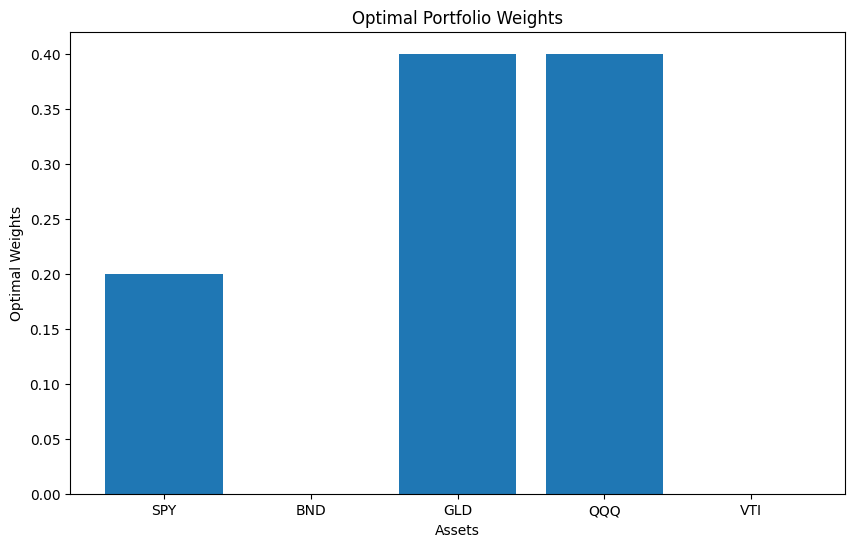

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

**Conclusion**

This Python script demonstrates how to use Modern Portfolio Theory to optimize a portfolio of stocks. By calculating the optimal weights for each asset, we aim to maximize the Sharpe ratio, providing the highest possible risk-adjusted return. This approach can help investors create a well-diversified portfolio and make informed decisions when allocating their investments.